In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
tf.__version__

'2.1.0'

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [25]:
from collections import Counter

print(f'n_classes: {len(Counter(y_train_full).keys())}')

n_classes: 10


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [47]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_full / 255.0
y_test = y_test_full

In [10]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneakers', 'Bag', 'Ankle boot']

In [17]:
class_names[y_train[3]]

'Ankle boot'

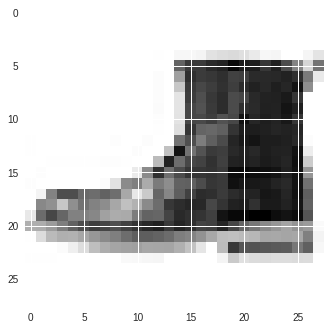

In [18]:
plt.imshow(X_train[3]);

# using sequential API to build a classification model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Flatten(input_shape=[28, 28]))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.layers

In [32]:
weights, biases = model.layers[1].get_weights()

In [33]:
weights

array([[ 6.5471321e-02, -4.8524808e-02,  1.9980803e-02, ...,
         1.2314595e-02,  5.3440496e-02, -5.3880859e-02],
       [ 4.9044490e-03, -3.9354783e-02, -5.3621009e-03, ...,
        -3.9087437e-02,  1.6982406e-03, -2.8027672e-02],
       [-4.7634546e-02, -1.9260082e-02, -5.1546700e-02, ...,
         1.2074672e-02, -2.5369778e-02,  8.6046755e-05],
       ...,
       [ 7.1931377e-02, -1.7212495e-02,  9.8253340e-03, ...,
         6.1579764e-02,  3.5400391e-02,  1.6646177e-02],
       [-5.6147635e-02,  4.3291271e-02,  1.4869608e-02, ...,
         5.6330070e-02,  2.0269044e-02,  6.6464677e-02],
       [ 2.7785085e-02, -1.3735220e-02, -2.4592895e-02, ...,
        -4.7313277e-02, -3.7001483e-02,  5.9868008e-02]], dtype=float32)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 133us/sample - loss: 0.7038 - accuracy: 0.7724 - val_loss: 0.5314 - val_accuracy: 0.8146
Epoch 2/30
55000/55000 [==============================] - 6s 115us/sample - loss: 0.4809 - accuracy: 0.8317 - val_loss: 0.4415 - val_accuracy: 0.8482
Epoch 3/30
55000/55000 [==============================] - 6s 114us/sample - loss: 0.4358 - accuracy: 0.8478 - val_loss: 0.4173 - val_accuracy: 0.8548
Epoch 4/30
55000/55000 [==============================] - 6s 115us/sample - loss: 0.4114 - accuracy: 0.8540 - val_loss: 0.4003 - val_accuracy: 0.8618
Epoch 5/30
55000/55000 [==============================] - 6s 115us/sample - loss: 0.3911 - accuracy: 0.8620 - val_loss: 0.3838 - val_accuracy: 0.8702
Epoch 6/30
55000/55000 [==============================] - 6s 114us/sample - loss: 0.3764 - accuracy: 0.8657 - val_loss: 0.3797 - val_accuracy: 0.8704
Epoch 7/30
55000/55000 [===========================

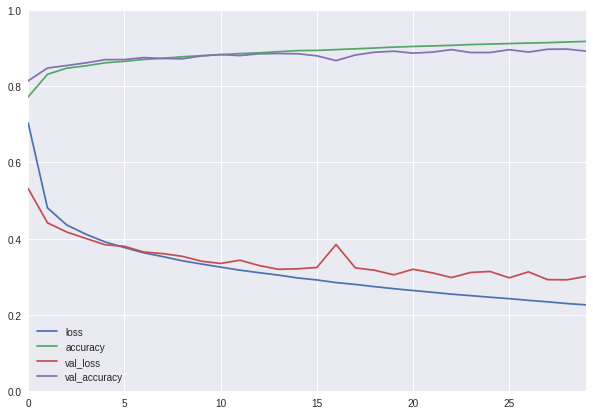

In [44]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10, 7));
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [48]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.3333 - accuracy: 0.8813


[0.3332813518345356, 0.8813]

In [51]:
X_new = X_test[:3]
y_true = y_test[:3]
[class_names[i] for i in y_true]

['Ankle boot', 'Pullover', 'Trousers']

In [58]:
y_proba = model.predict(X_new)
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.003, 0.   ,
        0.996],
       [0.   , 0.   , 0.996, 0.   , 0.003, 0.   , 0.001, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [59]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [60]:
[class_names[i] for i in y_pred]

['Ankle boot', 'Pullover', 'Trousers']

In [61]:
# continue with training 
history_1 = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 6s 114us/sample - loss: 0.2210 - accuracy: 0.9196 - val_loss: 0.2974 - val_accuracy: 0.8948
Epoch 2/15
55000/55000 [==============================] - 6s 114us/sample - loss: 0.2190 - accuracy: 0.9207 - val_loss: 0.2977 - val_accuracy: 0.8950
Epoch 3/15
55000/55000 [==============================] - 6s 114us/sample - loss: 0.2154 - accuracy: 0.9227 - val_loss: 0.2998 - val_accuracy: 0.8928
Epoch 4/15
55000/55000 [==============================] - 6s 114us/sample - loss: 0.2113 - accuracy: 0.9236 - val_loss: 0.2903 - val_accuracy: 0.8962
Epoch 5/15
55000/55000 [==============================] - 6s 114us/sample - loss: 0.2073 - accuracy: 0.9247 - val_loss: 0.2867 - val_accuracy: 0.8986
Epoch 6/15
55000/55000 [==============================] - 6s 114us/sample - loss: 0.2039 - accuracy: 0.9273 - val_loss: 0.2930 - val_accuracy: 0.8910
Epoch 7/15
55000/55000 [===========================

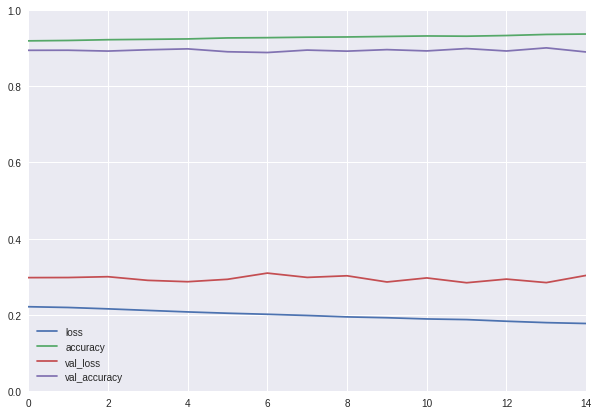

In [62]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7))
plt.gca().set_ylim(0, 1)
plt.show()

In [63]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.3315 - accuracy: 0.8845


[0.3314607475757599, 0.8845]

# Regression Model

In [64]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
housing = fetch_california_housing()

In [68]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing['data'], housing['target'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [71]:
model = keras.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.Dense(1))

In [72]:
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 89us/sample - loss: 0.8352 - val_loss: 1.0471
Epoch 2/20
11610/11610 [==============================] - 1s 59us/sample - loss: 1.1416 - val_loss: 0.6077
Epoch 3/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.5138 - val_loss: 0.4951
Epoch 4/20
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4815 - val_loss: 0.4682
Epoch 5/20
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4474 - val_loss: 0.4535
Epoch 6/20
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4338 - val_loss: 0.4432
Epoch 7/20
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4507 - val_loss: 0.4354
Epoch 8/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4163 - val_loss: 0.4330
Epoch 9/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4110 - val_l

In [73]:
mse_test = model.evaluate(X_test, y_test)
mse_test

5160/5160 [==============================] - 0s 28us/sample - loss: 0.3800


0.380039013541022

In [78]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[5.8519645],
       [2.4894643],
       [1.0479704]], dtype=float32)

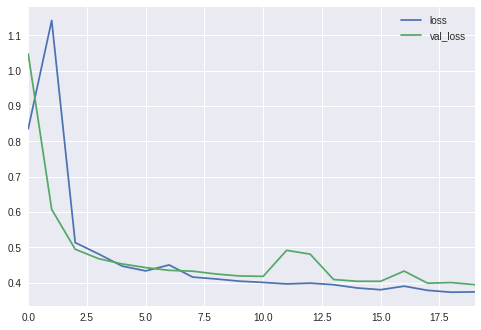

In [82]:
pd.DataFrame(history.history).plot();

# Functional API - Deep & Wide networks

In [83]:
# here the input passed both through the deep path (input -> hidden1 -> hidden2 -> concat)
# and through the wide path (input -> concat)
input_ = layers.Input(shape=X_train.shape[1:])
hidden1 = layers.Dense(30, activation='relu')(input_)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([input_, hidden2])
output = layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [87]:
# let's split the input matrix and send features 0-4 through the wide path and features
# 2-7 thorough the deep path
input_A = layers.Input(shape=[5], name='wide_input')
input_B = layers.Input(shape=[6], name='deep_input')
hidden1 = layers.Dense(30, activation='relu')(input_B)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([input_A, hidden2])
output = layers.Dense(1)(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [92]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [89]:
model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit((X_train_A, X_train_B), y_train, epochs=20, 
           validation_data=((X_valid_A, X_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 92us/sample - loss: 1.2186 - val_loss: 0.6105
Epoch 2/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.5239 - val_loss: 0.4950
Epoch 3/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5123 - val_loss: 0.4647
Epoch 4/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4362 - val_loss: 0.4509
Epoch 5/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.4189 - val_loss: 0.4314
Epoch 6/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4104 - val_loss: 0.4242
Epoch 7/20
11610/11610 [==============================] - 1s 64us/sample - loss: 0.3978 - val_loss: 0.4211
Epoch 8/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.3955 - val_loss: 0.4148
Epoch 9/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.3875 - val_l

In [90]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
mse_test

5160/5160 [==============================] - 0s 33us/sample - loss: 0.3708


0.3708456836005514

In [94]:
y_pred = model.predict((X_new_A, X_new_B))
y_pred

array([[5.9096646 ],
       [2.3043718 ],
       [0.98788995]], dtype=float32)

# Using callbacks

In [95]:
# saving the best model during the training
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing['data'], housing['target'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model = keras.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='sgd')

In [99]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.3450 - val_loss: 0.3602
Epoch 2/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3440 - val_loss: 0.3613
Epoch 3/100
11610/11610 [==============================] - 1s 61us/sample - loss: 0.3424 - val_loss: 0.3648
Epoch 4/100
11610/11610 [==============================] - 1s 61us/sample - loss: 0.3411 - val_loss: 0.3642
Epoch 5/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3391 - val_loss: 0.3590
Epoch 6/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3369 - val_loss: 0.3611
Epoch 7/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.3413 - val_loss: 0.3574
Epoch 8/100
11610/11610 [==============================] - 1s 60us/sample - loss: 0.3378 - val_loss: 0.3626
Epoch 9/100
11610/11610 [==============================] - 1s 60us/sample - loss: 0.335

Epoch 76/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3000 - val_loss: 0.3273
Epoch 77/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3002 - val_loss: 0.3299
Epoch 78/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3000 - val_loss: 0.3295
Epoch 79/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3012 - val_loss: 0.3369
Epoch 80/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3022 - val_loss: 0.3328
Epoch 81/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3000 - val_loss: 0.3332
Epoch 82/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.3127 - val_loss: 0.3316
Epoch 83/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3012 - val_loss: 0.3308
Epoch 84/100
11610/11610 [==============================] - 1s 60us/sample - loss: 0.2997 - val_loss: 0.3272
Epoch 85/100
11610/

In [100]:
model = keras.models.load_model('my_keras_model.h5')

In [101]:
model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 38us/sample - loss: 0.3216


0.3215945162976435

# early stopping callback

In [103]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=500, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/500
11610/11610 [==============================] - 1s 70us/sample - loss: 0.2995 - val_loss: 0.3311
Epoch 2/500
11610/11610 [==============================] - 1s 61us/sample - loss: 0.3016 - val_loss: 0.3279
Epoch 3/500
11610/11610 [==============================] - 1s 60us/sample - loss: 0.2994 - val_loss: 0.3264
Epoch 4/500
11610/11610 [==============================] - 1s 60us/sample - loss: 0.2996 - val_loss: 0.3266
Epoch 5/500
11610/11610 [==============================] - 1s 61us/sample - loss: 0.2976 - val_loss: 0.3364
Epoch 6/500
11610/11610 [==============================] - 1s 61us/sample - loss: 0.2986 - val_loss: 0.3274
Epoch 7/500
11610/11610 [==============================] - 1s 59us/sample - loss: 0.2970 - val_loss: 0.3330
Epoch 8/500
11610/11610 [==============================] - 1s 59us/sample - loss: 0.2969 - val_loss: 0.3384
Epoch 9/500
11610/11610 [==============================] - 1s 61us/sample - loss: 0.302

In [104]:
model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 29us/sample - loss: 0.3192


0.31915223963500916

# custom callback

In [105]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print(f'\nval/train: {logs["val_loss"] / lgos["loss"]}')

# using tensorboard

In [106]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

In [107]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [111]:
run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

model = keras.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 93us/sample - loss: 0.8051 - val_loss: 0.6472
Epoch 2/100
11610/11610 [==============================] - 1s 67us/sample - loss: 1.2351 - val_loss: 0.5188
Epoch 3/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4877 - val_loss: 0.4637
Epoch 4/100
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4594 - val_loss: 0.4480
Epoch 5/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4429 - val_loss: 0.4361
Epoch 6/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.4309 - val_loss: 0.4249
Epoch 7/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4216 - val_loss: 0.4173
Epoch 8/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.4125 - val_loss: 0.4118
Epoch 9/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.405

Epoch 76/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3168 - val_loss: 0.3349
Epoch 77/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.3162 - val_loss: 0.3315
Epoch 78/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.3148 - val_loss: 0.3346
Epoch 79/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.3140 - val_loss: 0.3305
Epoch 80/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3145 - val_loss: 0.3388
Epoch 81/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.3128 - val_loss: 0.3338
Epoch 82/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.3121 - val_loss: 0.3421
Epoch 83/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3118 - val_loss: 0.3269
Epoch 84/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.3113 - val_loss: 0.3407
Epoch 85/100
11610/